In [80]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import community  #This is the python-louvain package we installed
import numpy as np
import itertools
import csv

from plotly.offline import init_notebook_mode, iplot

import plotly.plotly as py
from plotly.graph_objs import *

init_notebook_mode(True)

***Question 1: For this part of the assignment, you need to create a graph by adding nodes and edges in a Python program using the networkx library. Visualize the created graph using matplotlib or plotly.***

In [2]:
def create_graph(graph):

    # extract nodes from graph
    nodes = set([i for i in itertools.chain.from_iterable(graph)])
    # create networkx graph
    g = nx.Graph()

    # add nodes
    for node in nodes:
        g.add_node(node)

    # add edges
    for edge in graph:
        g.add_edge(edge[0], edge[1])


#     # draw graph
    pos = nx.spring_layout(g)
    nx.draw(g, pos, with_labels=True)

    # show graph
    plt.show()

In [3]:
#creating graph example
network = [tuple(np.random.randint(1, 10, 2)) for i in range(20)]

In [4]:
network

[(2, 5),
 (1, 2),
 (6, 4),
 (7, 6),
 (8, 6),
 (2, 2),
 (3, 1),
 (2, 7),
 (9, 8),
 (9, 1),
 (2, 1),
 (8, 8),
 (8, 1),
 (1, 5),
 (5, 1),
 (5, 2),
 (7, 8),
 (6, 5),
 (7, 2),
 (1, 6)]

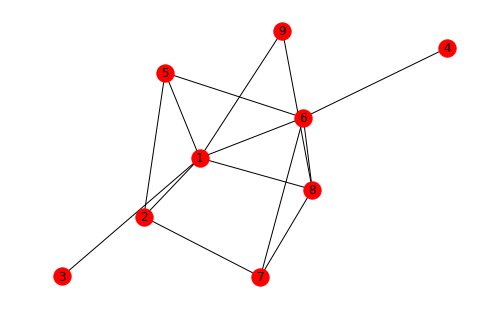

In [5]:
create_graph(network)

***Question 2: For this part of the assignment, read in data for a graph in the form of nodes and edges from a CSV file. This detailed tutorial on Exploring and Analyzing Network Data with Python can serve as a great starting point. Create your own CSV files of nodes and edges and visualize them using plotly or python-igraph.***

### Loading data

In [123]:
nodes_data = pd.read_csv('data/network/nodelist.csv')

In [124]:
nodes_data.head()

,Name,Gender
0,Patrick Yang,male
1,Santosh,male
2,Akshay,male
3,Prince,male
4,Neerja,female


In [125]:
node_names = list(nodes_data.Name)

In [126]:
edges_data = pd.read_csv('data/network/edgelist.csv')

In [127]:
edges_data.head()

,Source,Target
0,Patrick Yang,John
1,Santosh,Akshay
2,Akshay,Vash
3,Prince,Ting Ting
4,Neerja,Alvira


In [128]:
edges = [tuple(i) for i in edges_data.values]

In [129]:
edges

[('Patrick Yang', 'John'),
 ('Santosh', 'Akshay'),
 ('Akshay', 'Vash'),
 ('Prince', 'Ting Ting'),
 ('Neerja', 'Alvira'),
 ('Deena', 'Vash'),
 ('Arpita', 'Ting Ting'),
 ('Asmita', 'Fei'),
 ('Kerem', 'Nishan'),
 ('Jake', 'Kerem'),
 ('Spence', 'Kerem'),
 ('John', 'Akshay'),
 ('Ting Ting', 'John'),
 ('Danai', 'Sooraj'),
 ('Devesh', 'Kunal'),
 ('Kunal', 'Patrick Yang'),
 ('Fei', 'Danai'),
 ('David', 'Taylor'),
 ('Alvira', 'Matthew'),
 ('Vinay', 'Kunal'),
 ('Jason', 'John'),
 ('Ian', 'David'),
 ('Matthew', 'David'),
 ('Taylor', 'Alvira'),
 ('Vash', 'Arpita'),
 ('Davi', 'Shannon'),
 ('Jose', 'Neerja'),
 ('Holly', 'Santosh'),
 ('Ford', 'Asmita'),
 ('Nishan', 'Kerem'),
 ('Kaya', 'Taylor'),
 ('Sara', 'Fei'),
 ('Shannon', 'Kaya'),
 ('Tim', 'Arpita'),
 ('Tyler', 'Patrick Yang'),
 ('Santosh', 'Deena'),
 ('Akshay', 'Ting Ting'),
 ('Prince', 'Ford'),
 ('Neerja', 'Kerem'),
 ('Deena', 'Nishan'),
 ('Arpita', 'Spence'),
 ('Asmita', 'Davi'),
 ('Kerem', 'Ting Ting'),
 ('Spence', 'Nishan'),
 ('John', 'Tim')

In [130]:
len(edges)

200

In [131]:
len(node_names)

36

### Creating basic graph

In NetworkX, you can put these two lists together into a single network object that understands how nodes and edges are related. This object is called a Graph, referring to one of the common terms for data organized as a network

In [132]:
#intializaing graph object
G = nx.Graph()

In [133]:
#adding nodes and edges from iterables
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [134]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 184
Average degree:  10.2222


### Adding attributes

NetworkX provides two convenient functions for adding attributes to all of a Graph’s nodes or edges at once: `nx.set_node_attributes()` and `nx.set_edge_attributes()`. To use these functions, you’ll need your attribute data to be in the form of a Python dictionary, in which node names are the keys and the attributes you want to add are the values

In [135]:
gender_dict = {}

In [136]:
nodes_data.head(2)

,Name,Gender
0,Patrick Yang,male
1,Santosh,male


In [137]:
nodes_data_dict = nodes_data.to_dict()

In [138]:
nodes_data_dict.keys()

dict_keys(['Name', 'Gender'])

In [139]:
#creating a dictionary for attributes
for i in range(nodes_data.shape[0]):
    gender_dict[nodes_data_dict['Name'][i]] = nodes_data_dict['Gender'][i]

In [140]:
#adding attributes to the nodes
nx.set_node_attributes(G, gender_dict, 'gender')

In [141]:
#you can access attributes like this
for n in G.nodes():
    print(n, G.node[n]['gender'])

Patrick Yang male
Santosh male
Akshay male
Prince male
Neerja female
Deena female
Arpita female
Asmita female
Kerem male
Jake male
Spence male
John male
Ting Ting female
Danai female
Devesh male
Sooraj male
Kunal male
Fei female
David male
Alvira female
Vinay male
Jason male
Ian male
Matthew male
Taylor male
Vash male
Davi male
Jose male
Holly female
Ford male
Nishan male
Kaya female
Sara female
Shannon female
Tim male
Tyler male


### Metrics to analyze the network

In [142]:
#density
density = nx.density(G)
print("Network density:", density)

Network density: 0.2920634920634921


In [143]:
#shortest path
prince_akshay_path = nx.shortest_path(G, source="Prince", target="Akshay")

print("Shortest path between Prince and Akshay:", prince_akshay_path)
print("Length of that path:", len(prince_akshay_path) - 1)

Shortest path between Prince and Akshay: ['Prince', 'Ting Ting', 'Akshay']
Length of that path: 2


In [144]:
#diameter
nx.diameter(G)

3

In [145]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.30016675931072817


### Centrality

In [146]:
#calculate degree
degree_dict = dict(G.degree(G.nodes()))
#add it as an attribute to each node
nx.set_node_attributes(G, degree_dict, 'degree')

In [147]:
print(G.node['Akshay'])

{'gender': 'male', 'degree': 7}


In [148]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [149]:
sorted_degree[:10]

[('Kerem', 15),
 ('Ting Ting', 15),
 ('Neerja', 14),
 ('Asmita', 14),
 ('Taylor', 14),
 ('Nishan', 13),
 ('Santosh', 12),
 ('Deena', 12),
 ('Alvira', 12),
 ('Ian', 12)]

In [150]:
eigenvector_dict = nx.eigenvector_centrality(G)  # Run eigenvector centrality

In [151]:
sorted_eigen_degree = sorted(
    eigenvector_dict.items(), key=itemgetter(1), reverse=True)

In [152]:
sorted_eigen_degree[:10]

[('Kerem', 0.24903723785359042),
 ('Ting Ting', 0.2406484509853709),
 ('Asmita', 0.2286545475627169),
 ('Neerja', 0.22720407964061717),
 ('Taylor', 0.2234269648789995),
 ('Ford', 0.20378283415254025),
 ('Alvira', 0.19809188927551485),
 ('Ian', 0.19477319706654178),
 ('Nishan', 0.19332724073689117),
 ('Prince', 0.19317307110239276)]

In [153]:
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [154]:
# Run betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)

In [155]:
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

In [156]:
sorted_between = sorted(
    betweenness_dict.items(), key=itemgetter(1), reverse=True)

In [157]:
sorted_between[:10]

[('Taylor', 0.04652318237236416),
 ('Kerem', 0.046182539307935914),
 ('Nishan', 0.04370032826943967),
 ('Ting Ting', 0.03983645257562148),
 ('Neerja', 0.034864899176044684),
 ('Asmita', 0.03445433144017841),
 ('Santosh', 0.034155472465666116),
 ('Ian', 0.030232667946405615),
 ('Deena', 0.030082659326356804),
 ('Alvira', 0.03002636627773639)]

In [158]:
communities = community.best_partition(G)

In [159]:
nx.set_node_attributes(G, communities, 'modularity')

In [160]:
global_modularity = community.modularity(communities,
                                         G)  #finding global modularity

In [161]:
communities  # these are the communities within the network

{'Akshay': 1,
 'Alvira': 4,
 'Arpita': 1,
 'Asmita': 0,
 'Danai': 3,
 'Davi': 1,
 'David': 2,
 'Deena': 3,
 'Devesh': 4,
 'Fei': 3,
 'Ford': 4,
 'Holly': 1,
 'Ian': 4,
 'Jake': 3,
 'Jason': 2,
 'John': 0,
 'Jose': 3,
 'Kaya': 0,
 'Kerem': 4,
 'Kunal': 0,
 'Matthew': 2,
 'Neerja': 3,
 'Nishan': 2,
 'Patrick Yang': 0,
 'Prince': 2,
 'Santosh': 1,
 'Sara': 0,
 'Shannon': 1,
 'Sooraj': 3,
 'Spence': 2,
 'Taylor': 0,
 'Tim': 1,
 'Ting Ting': 2,
 'Tyler': 0,
 'Vash': 1,
 'Vinay': 2}

### Matplotlib

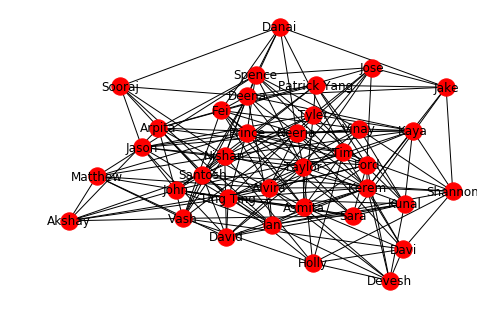

In [162]:
#plotting the network using matplotlib
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.figure(figsize=(20, 20))
# show Graph
plt.show()

### Plotly

Fruchterman-Reingold layout

In [187]:
pos = nx.fruchterman_reingold_layout(G)

N = len(node_names)

Xv = [pos[k][0] for k in node_names]
Yv = [pos[k][1] for k in node_names]
Xed = []
Yed = []

for edge in edges:
    Xed += [pos[edge[0]][0], pos[edge[1]][0], None]
    Yed += [pos[edge[0]][1], pos[edge[1]][1], None]

labels = list(G.nodes)

trace3 = Scatter(
    x=Xed,
    y=Yed,
    mode='lines',
    line=Line(color='rgb(210,210,210)', width=1),
    hoverinfo='none')
trace4 = Scatter(
    x=Xv,
    y=Yv,
    mode='markers',
    name='net',
    marker=Marker(
        symbol='dot',
        size=10,
        color='#6959CD',
        line=Line(color='rgb(50,50,50)', width=1)),
    text=labels,
    hoverinfo='text')

axis = dict(
    showline=False,  # hide axis line, grid, ticklabels and  title
    zeroline=False,
    showgrid=False,
    showticklabels=False,
    title='')

width = 800
height = 800
layout = Layout(
    title="Social circle of MSAN",
    font=Font(size=12),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
    ),
    hovermode='closest',
    annotations=Annotations([
        Annotation(
            showarrow=False,
            text='This networkx.Graph has the Kamada-Kawai layout',
            xref='paper',
            yref='paper',
            x=0,
            y=-0.1,
            xanchor='left',
            yanchor='bottom',
            font=Font(size=14))
    ]),
)

annot = "This networkx.Graph has the Fruchterman-Reingold layout"

data1 = Data([trace3, trace4])
fig1 = Figure(data=data1, layout=layout)
fig1['layout']['annotations'][0]['text'] = annot
iplot(fig1)

Kamada-Kawai layout

In [189]:
pos = nx.kamada_kawai_layout(G)

N = len(node_names)

Xv = [pos[k][0] for k in node_names]
Yv = [pos[k][1] for k in node_names]
Xed = []
Yed = []

for edge in edges:
    Xed += [pos[edge[0]][0], pos[edge[1]][0], None]
    Yed += [pos[edge[0]][1], pos[edge[1]][1], None]

labels = list(G.nodes)

trace3 = Scatter(
    x=Xed,
    y=Yed,
    mode='lines',
    line=Line(color='rgb(210,210,210)', width=1),
    hoverinfo='none')
trace4 = Scatter(
    x=Xv,
    y=Yv,
    mode='markers',
    name='net',
    marker=Marker(
        symbol='dot',
        size=10,
        color='#6959CD',
        line=Line(color='rgb(50,50,50)', width=1)),
    text=labels,
    hoverinfo='text')

axis = dict(
    showline=False,  # hide axis line, grid, ticklabels and  title
    zeroline=False,
    showgrid=False,
    showticklabels=False,
    title='')

width = 800
height = 800
layout = Layout(
    title="Social circle of MSAN",
    font=Font(size=12),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
    ),
    hovermode='closest',
    annotations=Annotations([
        Annotation(
            showarrow=False,
            text='This networkx.Graph has the Kamada-Kawai layout',
            xref='paper',
            yref='paper',
            x=0,
            y=-0.1,
            xanchor='left',
            yanchor='bottom',
            font=Font(size=14))
    ]),
)

annot = "This networkx.Graph has the Kamada-Kawai layout"

data1 = Data([trace3, trace4])
fig1 = Figure(data=data1, layout=layout)
fig1['layout']['annotations'][0]['text'] = annot
iplot(fig1)

Circular layout

In [190]:
pos = nx.circular_layout(G)

N = len(node_names)

Xv = [pos[k][0] for k in node_names]
Yv = [pos[k][1] for k in node_names]
Xed = []
Yed = []

for edge in edges:
    Xed += [pos[edge[0]][0], pos[edge[1]][0], None]
    Yed += [pos[edge[0]][1], pos[edge[1]][1], None]

labels = list(G.nodes)

trace3 = Scatter(
    x=Xed,
    y=Yed,
    mode='lines',
    line=Line(color='rgb(210,210,210)', width=1),
    hoverinfo='none')
trace4 = Scatter(
    x=Xv,
    y=Yv,
    mode='markers',
    name='net',
    marker=Marker(
        symbol='dot',
        size=10,
        color='#6959CD',
        line=Line(color='rgb(50,50,50)', width=1)),
    text=labels,
    hoverinfo='text')

axis = dict(
    showline=False,  # hide axis line, grid, ticklabels and  title
    zeroline=False,
    showgrid=False,
    showticklabels=False,
    title='')

width = 800
height = 800
layout = Layout(
    title="Social circle of MSAN",
    font=Font(size=12),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
    ),
    hovermode='closest',
    annotations=Annotations([
        Annotation(
            showarrow=False,
            text='This networkx.Graph has the Kamada-Kawai layout',
            xref='paper',
            yref='paper',
            x=0,
            y=-0.1,
            xanchor='left',
            yanchor='bottom',
            font=Font(size=14))
    ]),
)

annot = "This networkx.Graph has the circular layout"

data1 = Data([trace3, trace4])
fig1 = Figure(data=data1, layout=layout)
fig1['layout']['annotations'][0]['text'] = annot
iplot(fig1)

Spectral layout

In [196]:
pos = nx.spectral_layout(G)

N = len(node_names)

Xv = [pos[k][0] for k in node_names]
Yv = [pos[k][1] for k in node_names]
Xed = []
Yed = []

for edge in edges:
    Xed += [pos[edge[0]][0], pos[edge[1]][0], None]
    Yed += [pos[edge[0]][1], pos[edge[1]][1], None]

labels = list(G.nodes)

trace3 = Scatter(
    x=Xed,
    y=Yed,
    mode='lines',
    line=Line(color='rgb(210,210,210)', width=1),
    hoverinfo='none')
trace4 = Scatter(
    x=Xv,
    y=Yv,
    mode='markers',
    name='net',
    marker=Marker(
        symbol='dot',
        size=10,
        color='#6959CD',
        line=Line(color='rgb(50,50,50)', width=1)),
    text=labels,
    hoverinfo='text')

axis = dict(
    showline=False,  # hide axis line, grid, ticklabels and  title
    zeroline=False,
    showgrid=False,
    showticklabels=False,
    title='')

width = 800
height = 800
layout = Layout(
    title="Social circle of MSAN",
    font=Font(size=12),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
    ),
    hovermode='closest',
    annotations=Annotations([
        Annotation(
            showarrow=False,
            text='This networkx.Graph has the Kamada-Kawai layout',
            xref='paper',
            yref='paper',
            x=0,
            y=-0.1,
            xanchor='left',
            yanchor='bottom',
            font=Font(size=14))
    ]),
)

annot = "This networkx.Graph has the spectral layout"

data1 = Data([trace3, trace4])
fig1 = Figure(data=data1, layout=layout)
fig1['layout']['annotations'][0]['text'] = annot
iplot(fig1)